In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import random

## Bayesian Binary Hypothesis Testing

## Extending the set of a prioris

Consider again the example of flipping a coin 8 times and observing 8 heads. We wish to generalize our experimental test to deal with other cases beyond just either fair or two-sided:

Coins can be biased to land on one side more than the other. We can extend our previous experiment to allow any probability of heads from 0 to 1. Let's take a sample every 0.01:

In [2]:
np.linspace(0,1,101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [3]:
def exactcoins(flips=8, target=-1, num_sims=100000):
    
    if target==-1:
        target=flips
        
    allcoins=np.linspace(0,1,101)
    
    events=[]
    for sim in range(num_sims):
        prob_heads=npr.choice(allcoins)
        R=npr.uniform(size=flips)
        num_heads=np.sum(R<prob_heads)
        if num_heads==target:
            events+=[prob_heads]
            
    vals,counts=np.unique(events,return_counts=True)
    plt.bar(vals,counts/len(events),width=0.01) # Note that we had to change the bar width here!!!
    
    return events

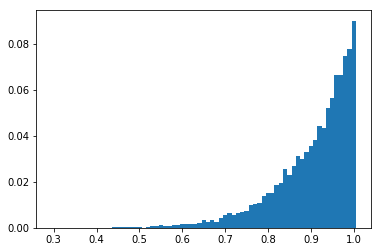

In [4]:
events=exactcoins()

How can we use this to conduct a statistical test? The output is a full set of *a posterior* probabilities for all of the possible $p$-values considered

A typical approach is to find see if a 95% or 99% confidence interval contains the fair coin ($p=0.5$).

Here are two basic approaches to finding the 95% confidence interval (without assuming anything about the distribution of the data):

**Confidence Interval Calculation Way 1**

Sort the data and find the points that are 2.5% and 97.5% of the way through the sorted data.

In [7]:
def confidence_interval(data, C):
    ''' Find the C% confidence interval given data'''
    pbar=1-C/100
    datalen=len(data)
    
    lower_bound=int(datalen*pbar/2)
    upper_bound=datalen-lower_bound-1
    print("bounds:",lower_bound,upper_bound)
    
    sorted=np.sort(data)
    
    print(C,"% confidence interval:[",sorted[lower_bound],",",sorted[upper_bound],"]")

In [8]:
confidence_interval(events,95)

bounds: 285 11151
95 % confidence interval:[ 0.66 , 1.0 ]


In [9]:
confidence_interval(events,99)

bounds: 57 11379
99 % confidence interval:[ 0.55 , 1.0 ]


What is your conclusion?

Under this prior, we would reject the possiblity that the coin is fair, because p=0.5 does not lie in the 95% or 99% confidence interval

**Confidence Interval Calculation Way 2**

The thing that makes it hard to find the confidence intervals from the graph is that we are really asking about the sums of the probabilities of the tails of the plot.

If we sum up the data as we move from left to right and plot the running sums, then we can see where we hit probabilities of 0.025 and 0.975

```numpy``` has a cumulative sum function ```np.cumsum``` to do just this:


In [10]:
vals,counts=np.unique(events,return_counts=True)
sum_counts=np.cumsum(counts/len(events))   

In [11]:
np.nonzero(sum_counts>=0.025)

(array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
        62]),)

In [13]:
np.nonzero(sum_counts>=0.025)[0][0]

28

In [14]:
vals[28]

0.66

In [28]:
def confidence_interval2(data, C):
    ''' Find the C% confidence interval given data'''
    pbar=1-C/100

    vals,counts=np.unique(data,return_counts=True)


    sum_counts=np.cumsum(counts/len(data))
    # locate the lowest value for which the cumulative sum exceeds the specified probability
    lower=np.nonzero(sum_counts>=pbar/2)[0][0]
    upper=np.nonzero(sum_counts>=(1-pbar/2))[0][0]
                  
    plt.bar(vals,sum_counts,width=0.01)
    plt.plot(vals,[pbar/2]*len(vals),'r')
    plt.plot(vals,[(1-pbar/2)]*len(vals),'g')
    
    print(C,"% confidence interval:[",vals[lower],",",vals[upper],"]")

95 % confidence interval:[ 0.66 , 1.0 ]


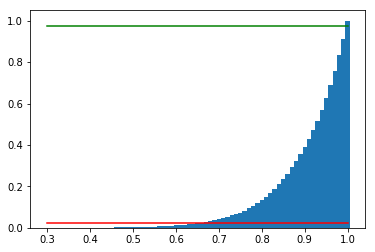

In [29]:
confidence_interval2(events,95)

For comparison, let's see what the *a posteriori* probabilities look like if we observe 4 heads on 8 flips of a coin:

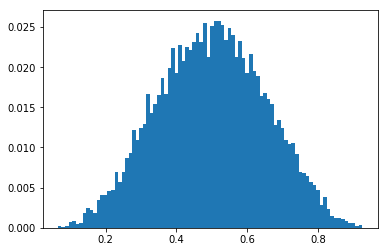

In [30]:
event2=exactcoins(8,4)

In [31]:
confidence_interval(event2,95)

bounds: 278 10850
95 % confidence interval:[ 0.21 , 0.79 ]


95 % confidence interval:[ 0.21 , 0.79 ]


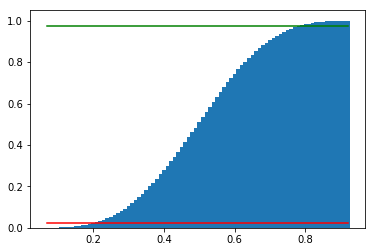

In [32]:
confidence_interval2(event2,95)

An interesting observation here -- 

The cumulative histogram is smooth, while the regular histogram is not. 

To explore this any further, we'll need to extend our tools for modeling random phenomena: